# **Digits Data - Which one is the best classification model?**

 The load_digits from scikit-learn loads a dataset of handwritten digits (0 to 9) that’s already built into the library — it's great for learning and testing classification models.

Digits is a Bunch object — kind of like a dictionary.
It contains:

**Attribute	Description**

digits.data	The features (pixel values of images)

digits.target	The labels (which digit it is: 0–9)

digits.images	The original 8x8 image arrays

digits.DESCR	A description of the dataset

digits.target_names	The possible digit labels (0–9)

In [82]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
digits = load_digits()

In [83]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

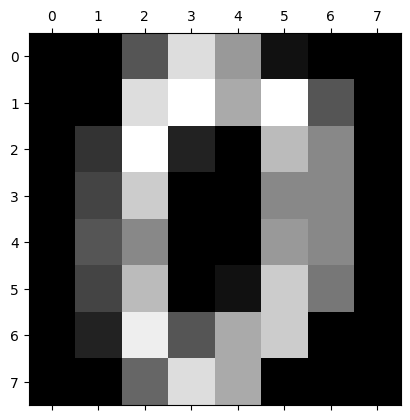

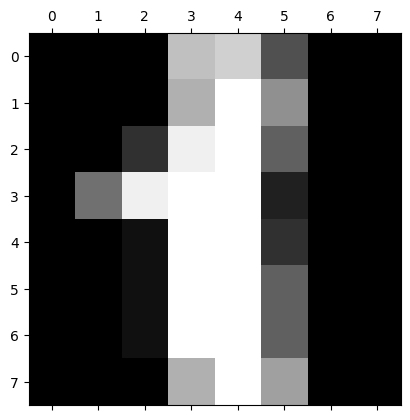

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# **Logistic Regression**

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_lr.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score

model_lrcs = cross_val_score(LogisticRegression(), X_test, y_test, cv=5)
model_lrcs

array([0.93055556, 0.93055556, 0.95833333, 0.94444444, 0.90277778])

In [ ]:
from sklearn.model_selection import GridSearchCV

model_lrgs = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),
{
    'C': [1,5,10,15,20]
},
cv=5, return_train_score=False)

In [ ]:
model_lrgs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='auto',
                                          solver='liblinear'),
             param_grid={'C': [1, 5, 10, 15, 20]})

In [ ]:
model_lrgs.cv_results_

{'mean_fit_time': array([0.12652364, 0.16417341, 0.17464871, 0.18777714, 0.18959947]),
 'std_fit_time': array([0.00337319, 0.00899459, 0.00481692, 0.01178745, 0.01112802]),
 'mean_score_time': array([0.00117192, 0.00116487, 0.00129099, 0.00117078, 0.00126505]),
 'std_score_time': array([4.85689954e-05, 3.87203517e-05, 1.75342781e-04, 1.82184246e-05,
        1.64699789e-04]),
 'param_C': masked_array(data=[1, 5, 10, 15, 20],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'C': 1}, {'C': 5}, {'C': 10}, {'C': 15}, {'C': 20}],
 'split0_test_score': array([0.95486111, 0.95138889, 0.95138889, 0.95138889, 0.95138889]),
 'split1_test_score': array([0.95138889, 0.94444444, 0.94791667, 0.94791667, 0.94791667]),
 'split2_test_score': array([0.96515679, 0.96515679, 0.96167247, 0.96167247, 0.96167247]),
 'split3_test_score': array([0.96515679, 0.96515679, 0.96515679, 0.96864111, 0.96864111]),
 'split4_test_score': array([0.96515679, 0.96515679, 0.961

In [ ]:
df = pd.DataFrame(model_lrgs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126524,0.003373,0.001172,0.000049,1,{'C': 1},0.954861,0.951389,0.965157,0.965157,0.965157,0.960344,0.005996,1
1,0.164173,0.008995,0.001165,0.000039,5,{'C': 5},0.951389,0.944444,0.965157,0.965157,0.965157,0.958261,0.008727,2
2,0.174649,0.004817,0.001291,0.000175,10,{'C': 10},0.951389,0.947917,0.961672,0.965157,0.961672,0.957561,0.006673,5
3,0.187777,0.011787,0.001171,0.000018,15,{'C': 15},0.951389,0.947917,0.961672,0.968641,0.961672,0.958258,0.007553,3
4,0.189599,0.011128,0.001265,0.000165,20,{'C': 20},0.951389,0.947917,0.961672,0.968641,0.961672,0.958258,0.007553,3


In [ ]:
df[['mean_test_score','param_C']]

,mean_test_score,param_C
0,0.960344,1
1,0.958261,5
2,0.957561,10
3,0.958258,15
4,0.958258,20


# **Random Forest**


In [ ]:
X = digits.data
Y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#ensemble is used when multiple algorithm is used to predict
#estimators = 50 the more models you use the better accuracy

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50)

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model_rf.score(X_test,y_test)

0.9777777777777777

In [ ]:
y_predicted = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_rf.predict(X_test))
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1, 35,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 25]])

Text(95.72222222222221, 0.5, 'Truth')

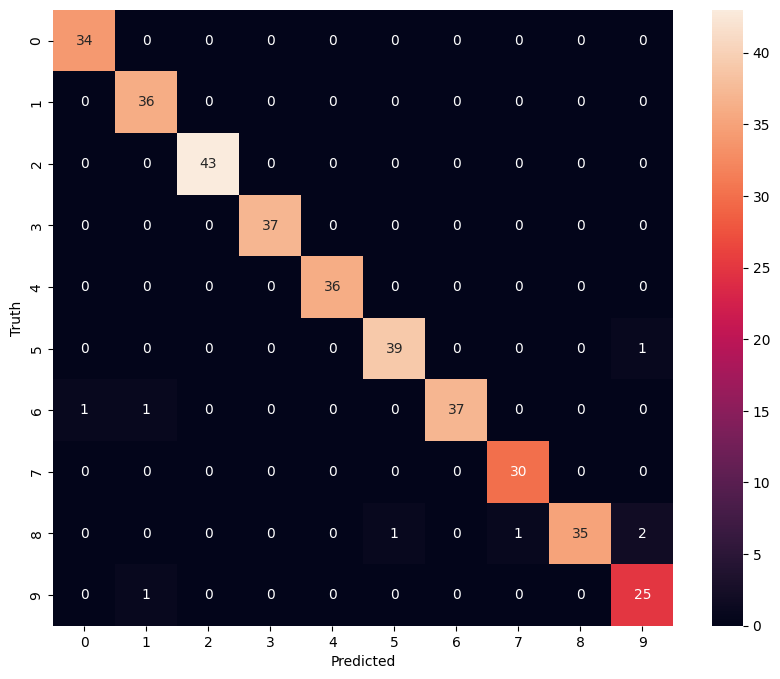

In [ ]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.model_selection import cross_val_score

#model_rfcvs - cross validation score with different sets of training data

model_rfcvs = cross_val_score(RandomForestClassifier(n_estimators=50), X, Y, cv=5)
model_rfcvs

array([0.92222222, 0.90833333, 0.95264624, 0.9637883 , 0.92200557])

In [ ]:
from sklearn.model_selection import GridSearchCV

#model_rfgs - random search model with girdsearch
#with varying hyperparameters

model_rfgs = (GridSearchCV(RandomForestClassifier(),
{
    'n_estimators': [10,20,40,50,60]
}, cv=5, return_train_score=False))

In [ ]:
model_rfgs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 40, 50, 60]})

In [ ]:
model_rfgs.cv_results_

{'mean_fit_time': array([0.0367167 , 0.07348423, 0.13677669, 0.17709146, 0.2083962 ]),
 'std_fit_time': array([0.00110016, 0.00382009, 0.00176655, 0.00466931, 0.00446115]),
 'mean_score_time': array([0.00284014, 0.0037396 , 0.0054738 , 0.00669475, 0.00784459]),
 'std_score_time': array([0.00048998, 0.00066432, 0.00014688, 0.00040479, 0.00032177]),
 'param_n_estimators': masked_array(data=[10, 20, 40, 50, 60],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60}],
 'split0_test_score': array([0.93055556, 0.94097222, 0.96527778, 0.96180556, 0.96875   ]),
 'split1_test_score': array([0.94444444, 0.96527778, 0.96180556, 0.97222222, 0.96875   ]),
 'split2_test_score': array([0.95121951, 0.95121951, 0.97560976, 0.97560976, 0.97212544]),
 'split3_test_score': array([0.95818815, 0.98954704, 0.94425087, 0.97560976, 0.95818815]),
 'split4

In [ ]:
df = pd.DataFrame(model_rfgs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036717,0.001100,0.002840,0.000490,10,{'n_estimators': 10},0.930556,0.944444,0.951220,0.958188,0.937282,0.944338,0.009787,5
1,0.073484,0.003820,0.003740,0.000664,20,{'n_estimators': 20},0.940972,0.965278,0.951220,0.989547,0.965157,0.962435,0.016352,3
2,0.136777,0.001767,0.005474,0.000147,40,{'n_estimators': 40},0.965278,0.961806,0.975610,0.944251,0.965157,0.962420,0.010199,4
3,0.177091,0.004669,0.006695,0.000405,50,{'n_estimators': 50},0.961806,0.972222,0.975610,0.975610,0.972125,0.971475,0.005073,1
4,0.208396,0.004461,0.007845,0.000322,60,{'n_estimators': 60},0.968750,0.968750,0.972125,0.958188,0.965157,0.966594,0.004746,2


In [ ]:
df[['mean_test_score','param_n_estimators']]

,mean_test_score,param_n_estimators
0,0.944338,10
1,0.962435,20
2,0.962420,40
3,0.971475,50
4,0.966594,60


# **Decision Tree**

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_dt.score(X_test,y_test)

0.8611111111111112

In [ ]:
from sklearn.model_selection import cross_val_score

model_dtcs = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
model_dtcs

array([0.76666667, 0.7       , 0.78830084, 0.83286908, 0.81058496])

In [ ]:
from sklearn.model_selection import GridSearchCV

model_dtgs = (GridSearchCV(DecisionTreeClassifier(),
{
    'criterion': ['gini','entropy']
}, cv=5, return_train_score=False))

In [ ]:
model_dtgs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [ ]:
model_dtgs.cv_results_

{'mean_fit_time': array([0.03168926, 0.03036351]),
 'std_fit_time': array([0.00393953, 0.00094109]),
 'mean_score_time': array([0.00145836, 0.00161428]),
 'std_score_time': array([9.96620917e-05, 1.93232715e-04]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.85763889, 0.84027778]),
 'split1_test_score': array([0.88194444, 0.83333333]),
 'split2_test_score': array([0.8466899 , 0.85714286]),
 'split3_test_score': array([0.83275261, 0.79094077]),
 'split4_test_score': array([0.83972125, 0.88850174]),
 'mean_test_score': array([0.85174942, 0.8420393 ]),
 'std_test_score': array([0.01719058, 0.03186482]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:
df = pd.DataFrame(model_dtgs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031689,0.003940,0.001458,0.000100,gini,{'criterion': 'gini'},0.857639,0.881944,0.846690,0.832753,0.839721,0.851749,0.017191,1
1,0.030364,0.000941,0.001614,0.000193,entropy,{'criterion': 'entropy'},0.840278,0.833333,0.857143,0.790941,0.888502,0.842039,0.031865,2


In [ ]:
df[['mean_test_score','param_criterion']]

,mean_test_score,param_criterion
0,0.851749,gini
1,0.842039,entropy


# **Support Vector Machine**

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model_svc.fit(X_train, y_train)

SVC()

In [ ]:
model_svc.score(X_test,y_test)

0.9888888888888889

In [ ]:
from sklearn.model_selection import GridSearchCV

model_svmgs = GridSearchCV(SVC(gamma='auto'),
 {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
},
cv=5, return_train_score=False)

In [ ]:
model_svmgs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [ ]:
model_svmgs.cv_results_

{'mean_fit_time': array([0.1649127 , 0.02240314, 0.16225119, 0.06753178, 0.16210856,
        0.02159357]),
 'std_fit_time': array([0.00634519, 0.00226982, 0.0053982 , 0.0218021 , 0.0024558 ,
        0.00066503]),
 'mean_score_time': array([0.03074236, 0.00590734, 0.0487247 , 0.01406736, 0.03283391,
        0.00553799]),
 'std_score_time': array([0.00053374, 0.00061022, 0.03675523, 0.00766824, 0.00443928,
        0.00011608]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'split0_test_s

In [ ]:
df = pd.DataFrame(model_svmgs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.164913,0.006345,0.030742,0.000534,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.368056,0.416667,0.449477,0.407666,0.351916,0.398756,0.034955,6
1,0.022403,0.002270,0.005907,0.000610,1,linear,"{'C': 1, 'kernel': 'linear'}",0.986111,0.986111,0.954704,0.972125,0.965157,0.972842,0.012171,1
2,0.162251,0.005398,0.048725,0.036755,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.406250,0.461806,0.494774,0.477352,0.411150,0.450266,0.035539,4
3,0.067532,0.021802,0.014067,0.007668,10,linear,"{'C': 10, 'kernel': 'linear'}",0.986111,0.986111,0.954704,0.972125,0.965157,0.972842,0.012171,1
4,0.162109,0.002456,0.032834,0.004439,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.406250,0.461806,0.494774,0.477352,0.411150,0.450266,0.035539,4
5,0.021594,0.000665,0.005538,0.000116,20,linear,"{'C': 20, 'kernel': 'linear'}",0.986111,0.986111,0.954704,0.972125,0.965157,0.972842,0.012171,1


In [ ]:
df[['mean_test_score','param_C','param_kernel']]

,mean_test_score,param_C,param_kernel
0,0.398756,1,rbf
1,0.972842,1,linear
2,0.450266,10,rbf
3,0.972842,10,linear
4,0.450266,20,rbf
5,0.972842,20,linear


# **SVM | Random Forest |  Logistic Regression | GaussianNB | MultinomialNB | Decision Tree**

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
#python dictionary holding all the machine learning model name
#along with hyperparameters of each model

model_param = {

    'svm': {
        'model': SVC(gamma='auto'),
        'param' : {
            'C': [1,10,15,20],
            'kernel': ['rbf','linear']
        }
    },


    'Random Forest': {
        'model': RandomForestClassifier(),
        'param' : {
            'n_estimators': [10,20,40,50,60]
        }
    },


    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'C': [1,5,10,15,20]
        }
    },


    'GaussianNB': {
        'model': GaussianNB(),
        'param': {}
    },


    'MultinomialNB': {
        'model': MultinomialNB(),
        'param': {}
    },


    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion': ['gini','entropy']
        }
    }
}

In [ ]:
scores = [] #list of scores

for model_name, par in model_param.items():
    model_gc =  GridSearchCV(par['model'], par['param'], cv=5, return_train_score=False)
    model_gc.fit(X, Y)
    scores.append({  #append values in the empty list
        'model': model_name,
        'best_score': model_gc.best_score_,
        'best_params': model_gc.best_params_
    })

In [ ]:
scores

[{'model': 'svm',
  'best_score': np.float64(0.9476973073351903),
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'Random Forest',
  'best_score': np.float64(0.9399148870318786),
  'best_params': {'n_estimators': 60}},
 {'model': 'Logistic Regression',
  'best_score': np.float64(0.9221138966264315),
  'best_params': {'C': 1}},
 {'model': 'GaussianNB',
  'best_score': np.float64(0.8069281956050759),
  'best_params': {}},
 {'model': 'MultinomialNB',
  'best_score': np.float64(0.8703497369235531),
  'best_params': {}},
 {'model': 'DecisionTreeClassifier',
  'best_score': np.float64(0.8035979572887652),
  'best_params': {'criterion': 'entropy'}}]

In [ ]:
#converting the scores list into a dataframe for better understanding
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,Random Forest,0.939915,{'n_estimators': 60}
2,Logistic Regression,0.922114,{'C': 1}
3,GaussianNB,0.806928,{}
4,MultinomialNB,0.870350,{}
5,DecisionTreeClassifier,0.803598,{'criterion': 'entropy'}
